
# Processus Gaussiens - Implémentation Manuelle

Ce notebook implémente un processus gaussien de manière **manuelle**, avec une fonction de noyau RBF paramétrable.
Il permet :
- de modifier les paramètres du noyau (longueur de corrélation, variance),
- d'observer leur impact sur la prédiction,
- de projeter les sorties sur un domaine contraint.

---


In [50]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [ ]:
matplotlib.rcParams['figure.figsize'] = (10, 6)

# Données fixes
rng = np.random.RandomState(0)
X_left = np.linspace(-5, -2, 5).reshape(-1, 1)
X_right = np.linspace(2, 5, 5).reshape(-1, 1)
X_train = np.vstack((X_left, X_right))
y_train = np.sin(X_train).ravel() + rng.normal(0, 0.1, X_train.shape[0])
X_test = np.linspace(-6, 6, 500).reshape(-1, 1)

# Noyau RBF
def rbf_kernel(x1, x2, length_scale=1.0):
    x1 = np.atleast_2d(x1)
    x2 = np.atleast_2d(x2)
    dists = np.sum((x1[:, np.newaxis] - x2[np.newaxis, :]) ** 2, axis=2)
    return np.exp(-0.5 * dists / length_scale**2)

# GPR manuel
def gp_predict(X_train, y_train, X_test, length_scale=1.0, noise=0.01):
    K = rbf_kernel(X_train, X_train, length_scale) + noise * np.eye(len(X_train))
    K_s = rbf_kernel(X_test, X_train, length_scale)
    K_ss = rbf_kernel(X_test, X_test, length_scale)

    K_inv = np.linalg.inv(K)

    mu_s = K_s @ K_inv @ y_train
    cov_s = K_ss - K_s @ K_inv @ K_s.T
    std_s = np.sqrt(np.clip(np.diag(cov_s), 0, None))  
    
    return mu_s, std_s

# Affichage interactif
def plot_gp(length_scale=1.0, noise=0.01):
    mu, std = gp_predict(X_train, y_train, X_test, length_scale, noise)
    
    plt.figure()
    plt.plot(X_test, np.sin(X_test), 'b--', label="f(x) = sin(x)")
    plt.plot(X_test, mu, 'r', label="Prédiction GP")
    plt.fill_between(X_test.ravel(), mu - 2*std, mu + 2*std,
                     color="orange", alpha=0.3, label="Incertitude ±2σ")
    plt.scatter(X_train, y_train, c='black', label="Train")
    plt.title(f"length_scale={length_scale:.2f}, noise={noise:.3f}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Widgets interactifs
interact(plot_gp,
         length_scale=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description='length_scale'),
         noise=FloatSlider(min=0.001, max=0.2, step=0.005, value=0.01, description='noise'))


interactive(children=(FloatSlider(value=1.0, description='length_scale', max=3.0, min=0.1), FloatSlider(value=…

<function __main__.plot_gp(length_scale=1.0, noise=0.01)>

In [ ]:

def rbf_kernel(X1, X2, length_scale=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) +np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)


In [53]:

def gp_predict_manual(X_train, y_train, X_test, kernel, kernel_params, sigma_y=1e-8):
    K = kernel(X_train, X_train, **kernel_params) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_test, **kernel_params)
    K_ss = kernel(X_test, X_test, **kernel_params)

    K_inv = np.linalg.inv(K)

    mu_s = K_s.T @ K_inv @ y_train
    cov_s = K_ss - K_s.T @ K_inv @ K_s

    return mu_s, np.sqrt(np.diag(cov_s))


In [54]:

# Données d'entraînement
n = 30
X_train = np.sort(6 * np.random.rand(n, 1) - 3, axis=0)
y_train = np.sin(X_train).ravel() + 0.2 * np.random.randn(n)

# Points de test
X_test = np.linspace(-5, 5, 200).reshape(-1, 1)


@interact(length_scale=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Length Scale'),
          sigma_f=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Sigma_f'))
def update_gp(length_scale=1.0, sigma_f=1.0):
    params = {"length_scale": length_scale, "sigma_f": sigma_f} # Paramètres du noyau RBF
    mu, std = gp_predict_manual(X_train, y_train, X_test, rbf_kernel, params)

    # Vraie fonction
    f_true = np.sin(X_test).ravel()

    plt.figure(figsize=(10, 6))
    plt.plot(X_test, f_true, 'b--', label='Vraie fonction $f(x) = \sin(x)$')
    plt.plot(X_test, mu, 'r-', label='Prédiction moyenne GP')
    plt.fill_between(X_test.ravel(), mu - 2*std, mu + 2*std, color='orange', alpha=0.3, label='Incertitude ±2σ')
    plt.plot(X_train, y_train, 'ko', label='Données d\'entraînement')

    plt.title("Régression avec Processus Gaussien")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.ylim(-2, 2)
    plt.show()



<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mriam\AppData\Local\Temp\ipykernel_24628\1889614015.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(X_test, f_true, 'b--', label='Vraie fonction $f(x) = \sin(x)$')


interactive(children=(FloatSlider(value=1.0, description='Length Scale', max=5.0, min=0.1), FloatSlider(value=…

Remarquons que Quand length_scale → 0, le noyau RBF devient presque nul sauf quand 𝑥=𝑥′, donc la matrice de covariance 𝐾 devient presque diagonale → mal conditionnée → instabilité à l’inversion.
Dans ce cas, la moyenne prédite saute partout et l’incertitude explose.

Voyons maintenant ce qu'il se passe si le domaine d'entrée est contraint

C:\Users\mriam\AppData\Local\Temp\ipykernel_24628\4047203794.py:11: RuntimeWarning: invalid value encountered in sqrt
  return mu_s, np.sqrt(np.diag(cov_s))


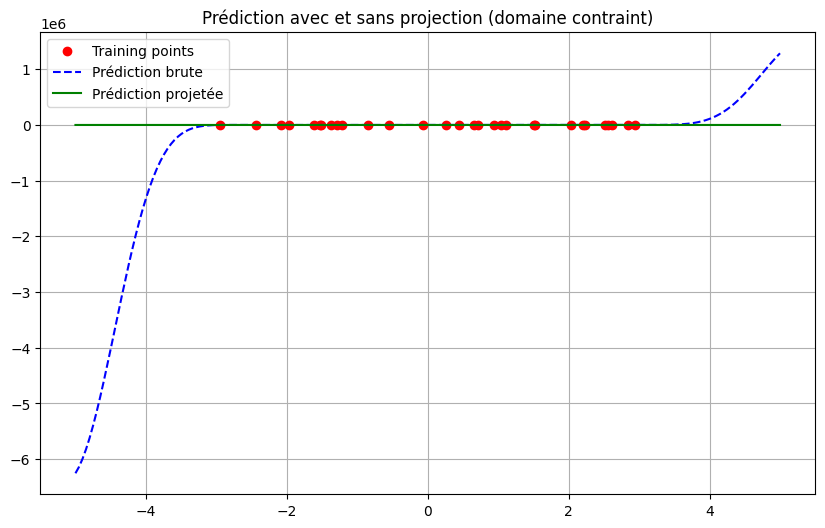

In [55]:

# Domaine contraint
domain_min, domain_max = -1, 1
mu_s, std_s = gp_predict_manual(X_train, y_train, X_test, rbf_kernel,kernel_params={"length_scale": 1.0, "sigma_f": 1.0})
# Projection
mu_projected = np.clip(mu_s, domain_min, domain_max)

plt.figure(figsize=(10,6))
plt.plot(X_train, y_train, 'ro', label='Training points')
plt.plot(X_test, mu_s, 'b--', label='Prédiction brute')
plt.plot(X_test, mu_projected, 'g-', label='Prédiction projetée')
plt.title("Prédiction avec et sans projection (domaine contraint)")
plt.legend()
plt.grid(True)
plt.show()


Il semblerait que contraindre le domaine d'entrée conduise à...

**Cas 2D** 

*Cas 2d du premier draft*

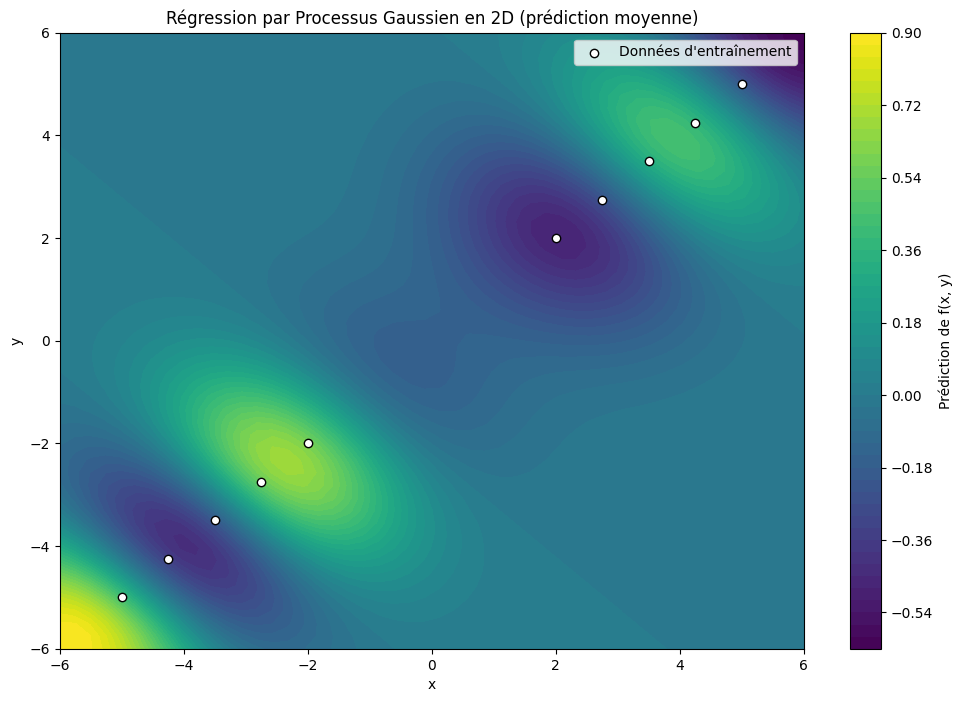

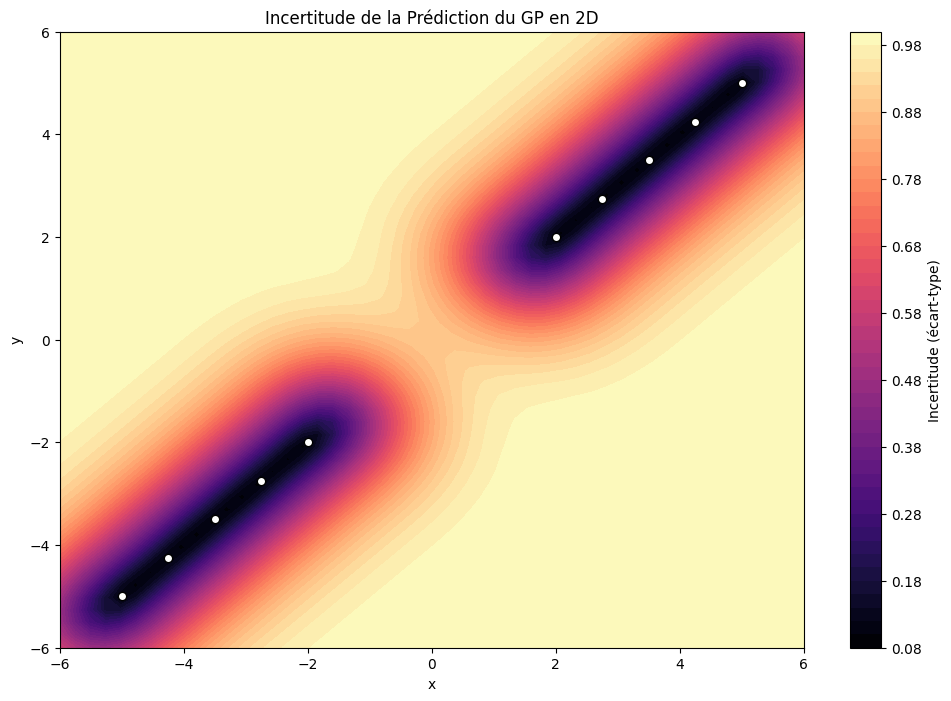

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# 1. Données d'entraînement 2D
rng = np.random.RandomState(0)

# On génère quelques points échantillons dans (x, y)
X1 = np.linspace(-5, -2, 5)
Y1 = np.linspace(-5, -2, 5)
X2 = np.linspace(2, 5, 5)
Y2 = np.linspace(2, 5, 5)

X_train = np.vstack([
    np.column_stack((X1, Y1)),
    np.column_stack((X2, Y2))
])

# Fonction cible en 2D
def f(X):
    x, y = X[:, 0], X[:, 1]
    return np.sin(x) * np.cos(y)

y_train = f(X_train) + rng.normal(0, 0.1, X_train.shape[0])

# 2. Définir le GP avec noyau RBF
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01)

# 3. Entraînement
gp.fit(X_train, y_train)

# 4. Prédiction sur une grille 2D
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
xx, yy = np.meshgrid(x, y)
X_test = np.column_stack((xx.ravel(), yy.ravel()))

y_mean, y_std = gp.predict(X_test, return_std=True)

# 5. Visualisation de la moyenne prédite
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, y_mean.reshape(xx.shape), levels=50, cmap='viridis')
plt.colorbar(label="Prédiction de f(x, y)")
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k', label="Données d'entraînement")
plt.title("Régression par Processus Gaussien en 2D (prédiction moyenne)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 6. Visualisation de l'incertitude
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, y_std.reshape(xx.shape), levels=50, cmap='magma')
plt.colorbar(label="Incertitude (écart-type)")
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k')
plt.title("Incertitude de la Prédiction du GP en 2D")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


*Cas 2d de l'implementation manuelle*

In [57]:
def rbf_kernel(X1, X2, length_scale=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    dists = np.sum((X1[:, np.newaxis, :] - X2[np.newaxis, :, :])**2, axis=2)
    return np.exp(-0.5 * dists / length_scale**2)


In [58]:
# Données 2D
X1 = np.linspace(-5, -2, 5)
Y1 = np.linspace(-5, -2, 5)
X2 = np.linspace(2, 5, 5)
Y2 = np.linspace(2, 5, 5)

X_train = np.vstack([
    np.column_stack((X1, Y1)),
    np.column_stack((X2, Y2))
])

# Fonction cible en 2D
def f(X):
    return np.sin(X[:, 0]) * np.cos(X[:, 1])

rng = np.random.RandomState(0)
y_train = f(X_train) + rng.normal(0, 0.1, X_train.shape[0])


In [59]:
x = np.linspace(-6, 6, 50)
y = np.linspace(-6, 6, 50)
xx, yy = np.meshgrid(x, y)
X_test = np.column_stack((xx.ravel(), yy.ravel()))


In [61]:
def plot_gp(length_scale=1.0, noise=0.01):
    mu, std = gp_predict(X_train, y_train, X_test, length_scale, noise)
    
    # Affichage de la prédiction moyenne
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, mu.reshape(xx.shape), levels=50, cmap='viridis')
    plt.colorbar(label="Prédiction moyenne")
    plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k', label="Données d'entraînement")
    plt.title(f"Prédiction GP 2D - length_scale={length_scale:.2f}, noise={noise:.3f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Affichage de l'incertitude
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, std.reshape(xx.shape), levels=50, cmap='magma')
    plt.colorbar(label="Incertitude (écart-type)")
    plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolors='k')
    plt.title(f"Incertitude GP 2D - length_scale={length_scale:.2f}, noise={noise:.3f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    print(xx.shape, yy.shape, mu.shape)
    plt.show()


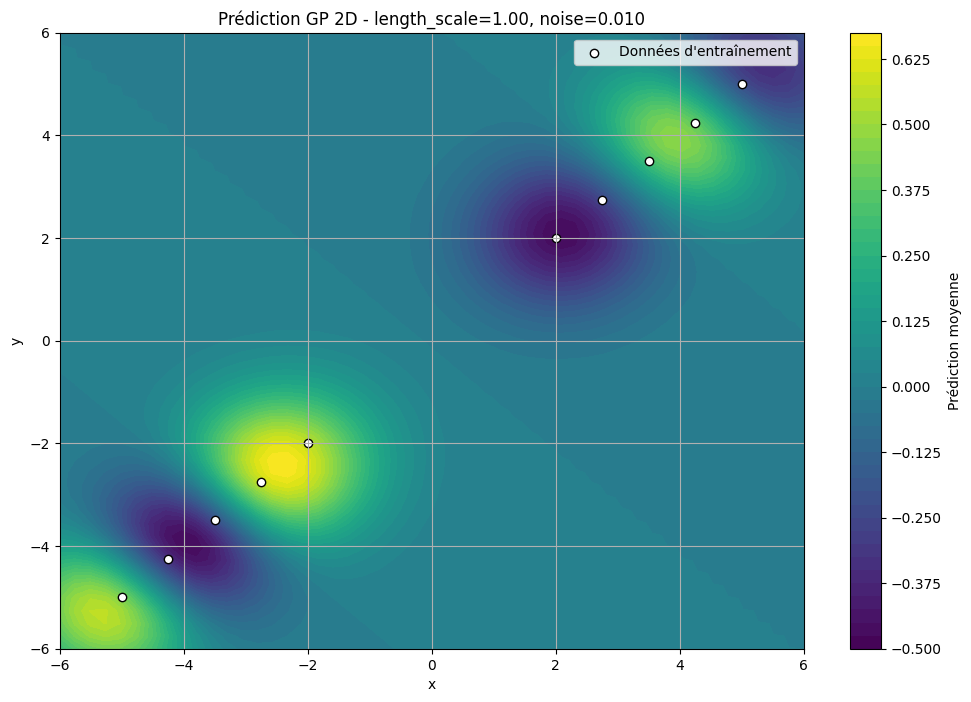

(50, 50) (50, 50) (2500,)


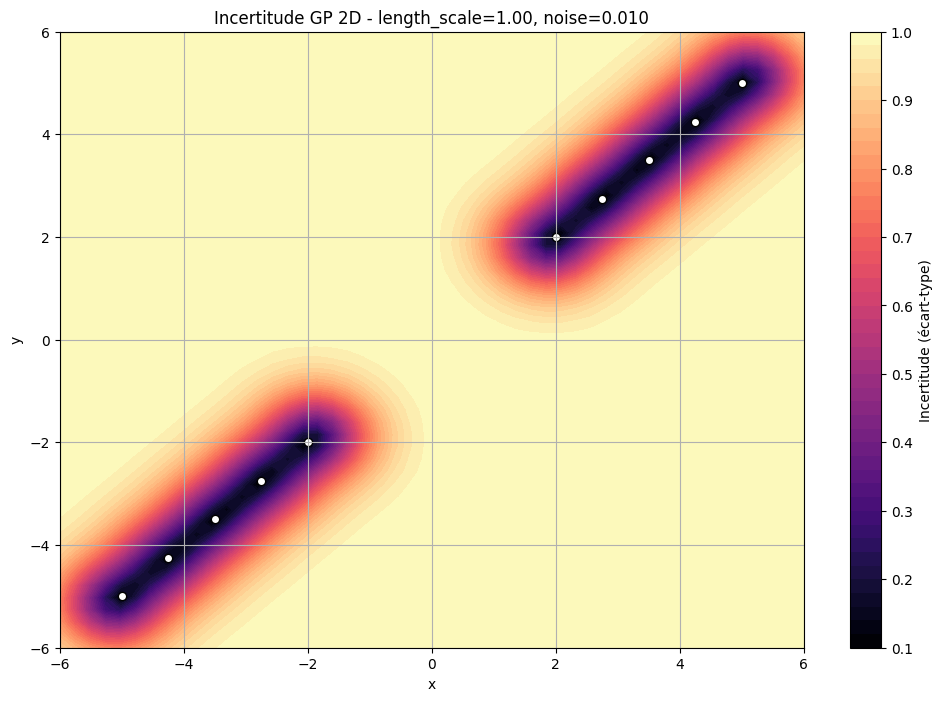

In [62]:
plot_gp()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 1. Données fixes 2D
rng = np.random.RandomState(0)
n_samples = 100

X_full = rng.uniform(-5, 5, size=(n_samples, 2))

# Retirer les points dans [-2,2]x[-2,2] pour créer un "trou"
mask = ~((np.abs(X_full[:,0]) < 2) & (np.abs(X_full[:,1]) < 2))
X_train = X_full[mask]

# Fonction cible
def f(X):
    X = np.atleast_2d(X)
    return np.sin(X[:,0]) * np.cos(X[:,1])

y_train = f(X_train) + rng.normal(0, 0.1, size=X_train.shape[0])

# 2. Noyau RBF 2D
def rbf_kernel(X1, X2, length_scale=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    dists = np.sum((X1[:, np.newaxis, :] - X2[np.newaxis, :, :])**2, axis=2)
    return np.exp(-0.5 * dists / length_scale**2)

# 3. GPR manuel 2D
def gp_predict(X_train, y_train, X_test, length_scale=1.0, noise=0.01):
    K = rbf_kernel(X_train, X_train, length_scale) + noise * np.eye(len(X_train))
    K_s = rbf_kernel(X_test, X_train, length_scale)
    K_ss = rbf_kernel(X_test, X_test, length_scale)

    K_inv = np.linalg.inv(K)

    mu_s = K_s @ K_inv @ y_train
    cov_s = K_ss - K_s @ K_inv @ K_s.T
    std_s = np.sqrt(np.clip(np.diag(cov_s), 0, None))
    
    return mu_s, std_s

# 4. Affichage interactif
def plot_gp(length_scale=1.0, noise=0.01):
    # Grille 2D pour tester
    x = np.linspace(-5, 5, 50)
    y = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(x, y)
    X_test = np.column_stack([xx.ravel(), yy.ravel()])
    
    mu, std = gp_predict(X_train, y_train, X_test, length_scale, noise)
    
    mu = mu.reshape(xx.shape)
    std = std.reshape(xx.shape)
    
    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    
    # Moyenne prédite
    im0 = axes[0].contourf(xx, yy, mu, levels=50, cmap='viridis')
    axes[0].scatter(X_train[:,0], X_train[:,1], c='white', edgecolors='k')
    axes[0].set_title(f"Prédiction GP (mean), length_scale={length_scale:.2f}")
    fig.colorbar(im0, ax=axes[0])
    
    # Incertitude prédite
    im1 = axes[1].contourf(xx, yy, std, levels=50, cmap='inferno')
    axes[1].scatter(X_train[:,0], X_train[:,1], c='white', edgecolors='k')
    axes[1].set_title(f"Incertitude GP (std), noise={noise:.3f}")
    fig.colorbar(im1, ax=axes[1])

    for ax in axes:
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

# 5. Widgets
interact(plot_gp,
         length_scale=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description='length_scale'),
         noise=FloatSlider(min=0.001, max=0.2, step=0.005, value=0.01, description='noise'));


interactive(children=(FloatSlider(value=1.0, description='length_scale', max=3.0, min=0.1), FloatSlider(value=…

*Affichage en 3D des fonctions*

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mriam\AppData\Local\Temp\ipykernel_24628\551655647.py:29: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title('Vraie fonction : $f(x,y) = \sin(x) \cos(y)$')


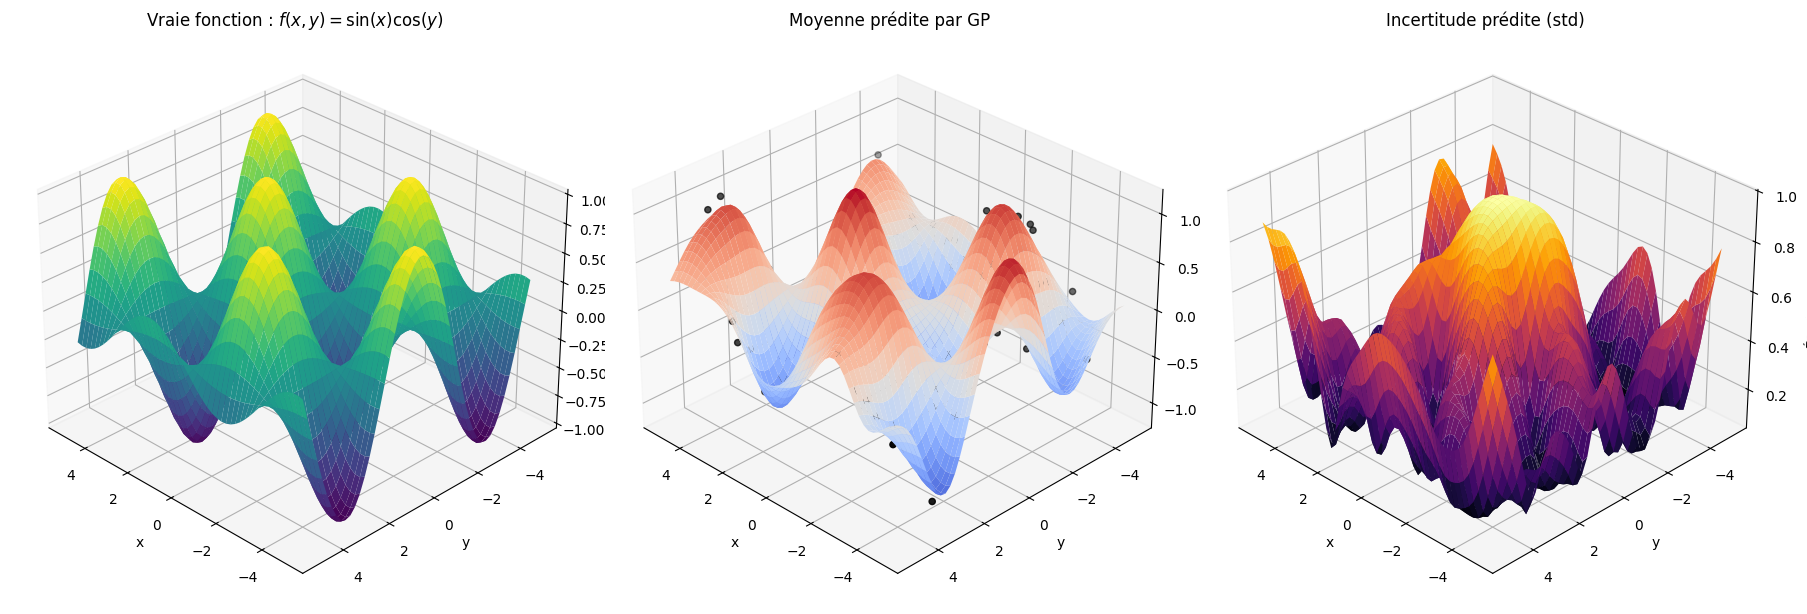

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Grille 2D
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(x, y)
X_test = np.column_stack([xx.ravel(), yy.ravel()])

# 2. Fonction cible
def f(X):
    X = np.atleast_2d(X)
    return np.sin(X[:,0]) * np.cos(X[:,1])

Z_true = f(X_test).reshape(xx.shape)

# 3. Prédiction GP
mu, std = gp_predict(X_train, y_train, X_test, length_scale=1.0, noise=0.01)
Z_mu = mu.reshape(xx.shape)
Z_std = std.reshape(xx.shape)

# 4. Affichage 3D
fig = plt.figure(figsize=(18, 6))

# (a) Fonction vraie
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(xx, yy, Z_true, cmap='viridis')
ax1.set_title('Vraie fonction : $f(x,y) = \sin(x) \cos(y)$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.view_init(elev=30, azim=135)

# (b) Moyenne prédite
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(xx, yy, Z_mu, cmap='coolwarm')
ax2.scatter(X_train[:,0], X_train[:,1], f(X_train), color='k', s=20)  # Points train visibles
ax2.set_title('Moyenne prédite par GP')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Prédiction')
ax2.view_init(elev=30, azim=135)

# (c) Incertitude prédite
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(xx, yy, Z_std, cmap='inferno')
ax3.set_title('Incertitude prédite (std)')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Écart-type')
ax3.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()


*Essai d'extension à un domaine comme la sphere*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 1. Données sur la sphère
rng = np.random.RandomState(0)
n_samples = 200

# Générer des points uniformes sur la sphère S²
def sample_sphere(n, rng):
    vec = rng.normal(size=(n, 3))
    vec /= np.linalg.norm(vec, axis=1)[:, np.newaxis]
    return vec

X_full = sample_sphere(n_samples, rng)

# Fonction cible sur la sphère
def f(X):
    X = np.atleast_2d(X)
    return np.sin(X[:,0]) * np.cos(X[:,1]) * np.sin(X[:,2])

y_full = f(X_full) + rng.normal(0, 0.1, size=X_full.shape[0])

# 2. Noyau basé sur la distance géodésique sur S²
def geodesic_kernel(X1, X2, length_scale=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    dot_products = np.clip(X1 @ X2.T, -1.0, 1.0)  # Sécurité numérique
    theta = np.arccos(dot_products)  # Angle entre deux vecteurs
    return np.exp(-0.5 * (theta / length_scale)**2)

# 3. GP sur sphère
def gp_predict(X_train, y_train, X_test, length_scale=1.0, noise=0.01):
    K = geodesic_kernel(X_train, X_train, length_scale) + noise * np.eye(len(X_train))
    K_s = geodesic_kernel(X_test, X_train, length_scale)
    K_ss = geodesic_kernel(X_test, X_test, length_scale)

    K_inv = np.linalg.inv(K)

    mu_s = K_s @ K_inv @ y_train
    cov_s = K_ss - K_s @ K_inv @ K_s.T
    std_s = np.sqrt(np.clip(np.diag(cov_s), 0, None))
    
    return mu_s, std_s

# 4. Affichage interactif
def plot_gp_and_target(length_scale=1.0, noise=0.01):
    # Points de test uniformes sur la sphère
    X_test = sample_sphere(500, rng)

    mu, std = gp_predict(X_full, y_full, X_test, length_scale, noise)

    # Calcul de la fonction cible sur la sphère
    target_values = f(X_test)

    # Visualisation
    fig = plt.figure(figsize=(15,6))

    # Plot des prédictions du GP
    ax1 = fig.add_subplot(131, projection='3d')
    sc1 = ax1.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=mu, cmap='viridis', s=20)
    ax1.set_title(f"GP sur sphère : Moyenne prédite\nlength_scale={length_scale:.2f}")
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.set_box_aspect([1,1,1])
    fig.colorbar(sc1, ax=ax1, shrink=0.5, aspect=5, label='Moyenne prédite')

    # Plot de l'incertitude du GP
    ax2 = fig.add_subplot(132, projection='3d')
    sc2 = ax2.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=std, cmap='inferno', s=20)
    ax2.set_title(f"GP sur sphère : Incertitude\nnoise={noise:.3f}")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    ax2.set_box_aspect([1,1,1])
    fig.colorbar(sc2, ax=ax2, shrink=0.5, aspect=5, label='Incertitude')

    # Plot de la fonction cible
    ax3 = fig.add_subplot(133, projection='3d')
    sc3 = ax3.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=target_values, cmap='plasma', s=20)
    ax3.set_title("Fonction cible sur la sphère")
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('z')
    ax3.set_box_aspect([1,1,1])
    fig.colorbar(sc3, ax=ax3, shrink=0.5, aspect=5, label='Valeur de la fonction cible')

    plt.tight_layout()
    plt.show()

# 5. Widgets interactifs
interact(plot_gp_and_target,
         length_scale=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description='length_scale'),
         noise=FloatSlider(min=0.001, max=0.2, step=0.005, value=0.01, description='noise'));


interactive(children=(FloatSlider(value=1.0, description='length_scale', max=3.0, min=0.1), FloatSlider(value=…